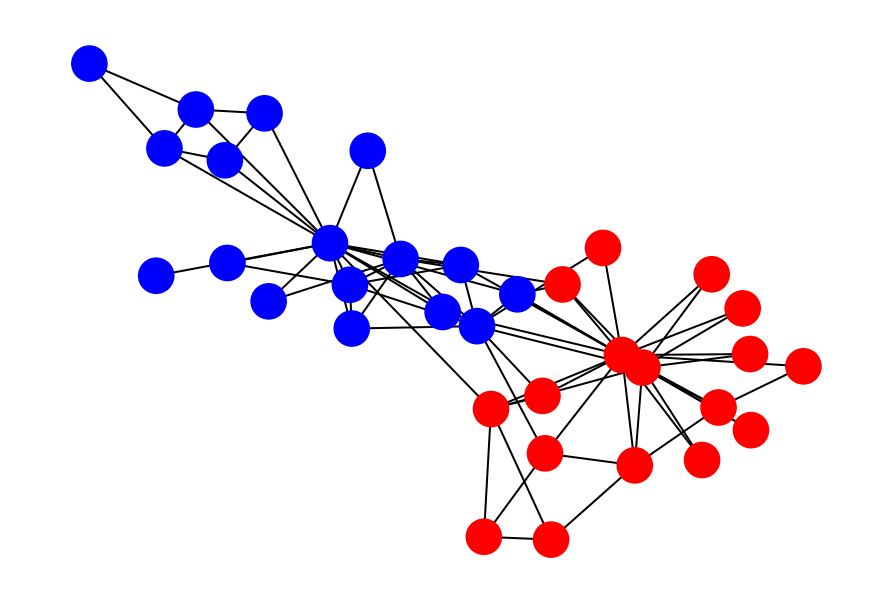

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

zachary = nx.generators.social.karate_club_graph()
nx.draw(
    zachary,
    node_color=[
        {"Officer": "r", "Mr. Hi": "b"}.get(dt["club"]) for _, dt
        in zachary.nodes(data=True)
    ],
)
plt.show()

In [2]:
capacity = 30
items = [(4, 370), (9, 1950), (10, 3400), (21, 6700), (17, 6100), (3, 800), (27, 8300),]

In [3]:
items_and_score = sorted(
    [(it[0], it[1], it[1] / it[0]) for it in items],
    key=lambda x: x[2],
    reverse=True
)

print("Items, sorted by relative cost:")
for it in items_and_score:
    print(f"Weight: {it[0]}\tCost: {it[1]}\tRelative Cost: {it[2]}")

Items, sorted by relative cost:
Weight: 17	Cost: 6100	Relative Cost: 358.8235294117647
Weight: 10	Cost: 3400	Relative Cost: 340.0
Weight: 21	Cost: 6700	Relative Cost: 319.04761904761904
Weight: 27	Cost: 8300	Relative Cost: 307.4074074074074
Weight: 3	Cost: 800	Relative Cost: 266.6666666666667
Weight: 9	Cost: 1950	Relative Cost: 216.66666666666666
Weight: 4	Cost: 370	Relative Cost: 92.5


In [4]:
solution = []
w = capacity
min_weight = min([it[0] for it in items_and_score])

while True:
    if w < min_weight:
        break
    else:
        cand = [it for it in items_and_score if it[0] <= w][0]
        solution.append(cand)
        w -= cand[0]

final_score = sum([it[1] for it in solution])
final_weight = sum([it[0] for it in solution])

print(f"Final score: {final_score}")
print(f"Total weight of items: {final_weight}")

Final score: 10300
Total weight of items: 30


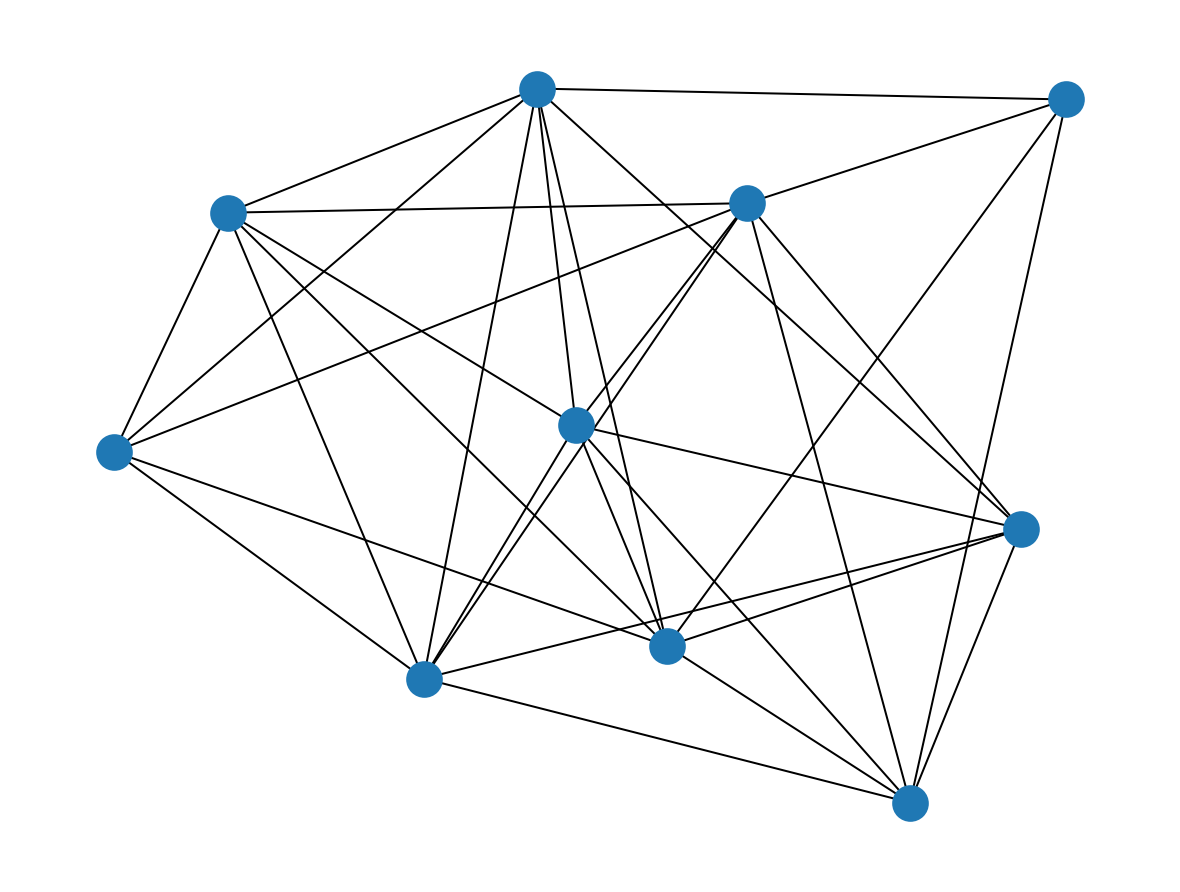

In [5]:
import numpy as np
from typing import List
from typing import Union


plt.figure(figsize=(8, 6))

np.random.seed(42)
rand_mat = np.random.rand(10, 10)
rand_adj = (rand_mat + rand_mat.T) / 2
rand_adj[rand_adj < 0.35] = 0.0
np.fill_diagonal(rand_adj, 0)

g = nx.Graph(rand_adj)
nx.draw(g)

plt.show()

In [6]:
def score(g: nx.classes.graph.Graph, x: List[int]) -> (float):
    score = 0
    for e in g.edges(data=True):
        if x[e[0]] != x[e[1]]:
            score += e[2]["weight"]
    return score

In [7]:
def split_random_node(random_seed: int) -> (List[int]):

    np.random.seed(random_seed)
    random_x = [
        1 if np.random.random() <= 0.5 else -1
        for _ in range(g.number_of_nodes())
    ]
    print(f"Random seed {random_seed}\tScore: {score(g, random_x):.2f}")

    return random_x

for random_seed in [2019, 2020, 2021]:
    random_x = split_random_node(random_seed)

Random seed 2019	Score: 7.78
Random seed 2020	Score: 7.23
Random seed 2021	Score: 9.38


In [8]:
from copy import copy

e_history = []
x = random_x
T = T_0 = 100
e = score(g, x)
e_history.append(e)

def bolzman(e_old: float, e_new: float, T: Union[int, float]) -> (float):
    return np.exp((e_new - e_old) / T)

def permute(x: List[int]) -> (List[int]):
    i = np.random.randint(0, len(x) - 1)
    x_new = copy(x)
    x_new[i] *= -1

    return x_new

for i in range(1500):
    new_state = permute(x)
    new_e = score(g, new_state)

    if new_e > e:
        e = new_e
        x = new_state
    else:
        prob = bolzman(e, new_e, T)
        if np.random.rand() <= prob:
            e = new_e
            x = new_state

    e_history.append(e)
    T = T_0 / (i + 1)

print(f"Final energy: {e:.2f}")

Final energy: 12.62


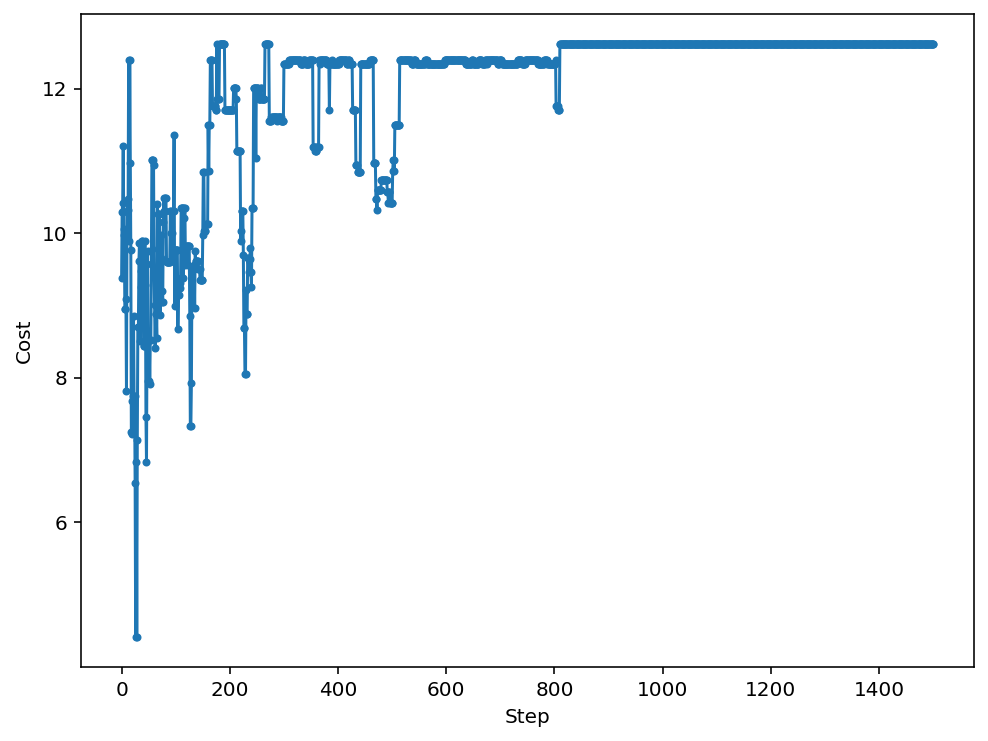

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(e_history)), e_history, ".-")
plt.xlabel("Step")
plt.ylabel("Cost")
plt.show()